# Projeto de Regressão Logística


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.


## Importar bibliotecas

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

## Ler os dados

In [3]:
ad_data = pd.read_csv('dataset/advertising.csv')

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Vamos renomear

In [5]:
ad_data.columns = ['Tempo no Site em Min', 'Idade', 'Média de Renda', 'Uso de Internet Diario', 'Titulo do Anuncio', 'Cidade', 'Masculino', 'País', 'Hora de Clique', 'Clique']

* Conferindo

In [6]:
ad_data.head()

,Tempo no Site em Min,Idade,Média de Renda,Uso de Internet Diario,Titulo do Anuncio,Cidade,Masculino,País,Hora de Clique,Clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tempo no Site em Min    1000 non-null   float64
 1   Idade                   1000 non-null   int64  
 2   Média de Renda          1000 non-null   float64
 3   Uso de Internet Diario  1000 non-null   float64
 4   Titulo do Anuncio       1000 non-null   object 
 5   Cidade                  1000 non-null   object 
 6   Masculino               1000 non-null   int64  
 7   País                    1000 non-null   object 
 8   Hora de Clique          1000 non-null   object 
 9   Clique                  1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
ad_data.describe()

,Tempo no Site em Min,Idade,Média de Renda,Uso de Internet Diario,Masculino,Clique
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise de dados explorátoria 

Vamos usar Seaborn para visualizar os dados.

* Histograma da Idade

<AxesSubplot:xlabel='Idade', ylabel='Count'>

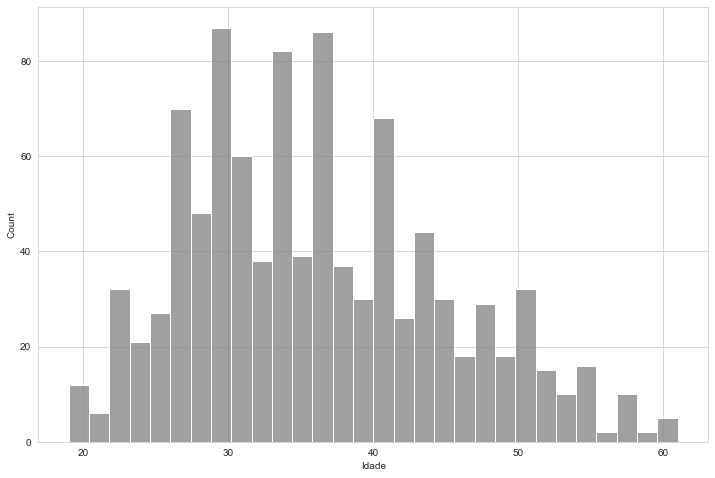

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(ad_data['Idade'], bins=30, color='grey')

* Criando um jointplot entre 'Média de Renda' e 'Idade'

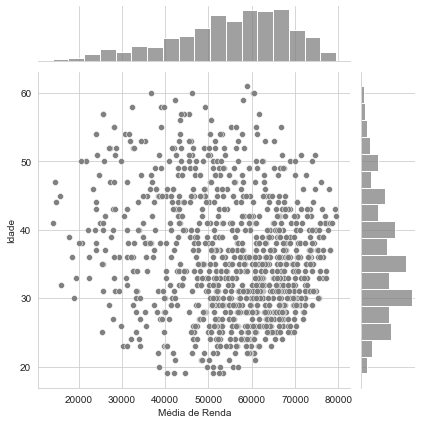

In [35]:

sns.jointplot(x='Média de Renda', y='Idade', data=ad_data, color='grey')

* Criando um jointplot que mostre as distribuições KDE do 'Tempo no Site em Min' no site vs 'Idade'.

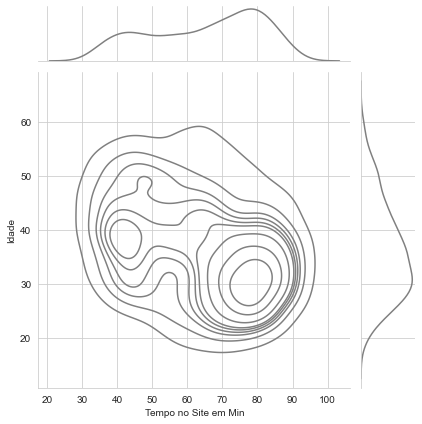

In [37]:

sns.jointplot(x='Tempo no Site em Min', y='Idade', data=ad_data, kind='kde', color='grey')

* Criando um jointplot do 'Tempo no Site em Min' vs. 'Uso de Internet Diario'.

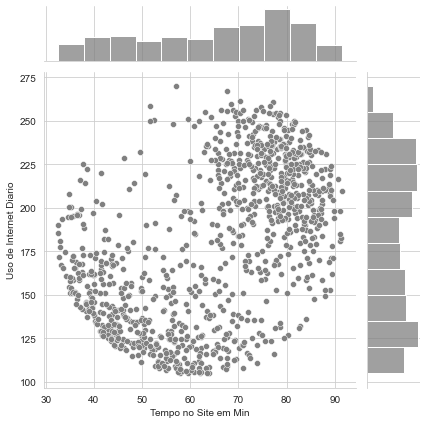

In [39]:
sns.jointplot(x='Tempo no Site em Min', y='Uso de Internet Diario', data=ad_data, color='grey')

* Finalmente, crie um pairlot com a matiz definido pelo recurso da coluna 'Clique'.

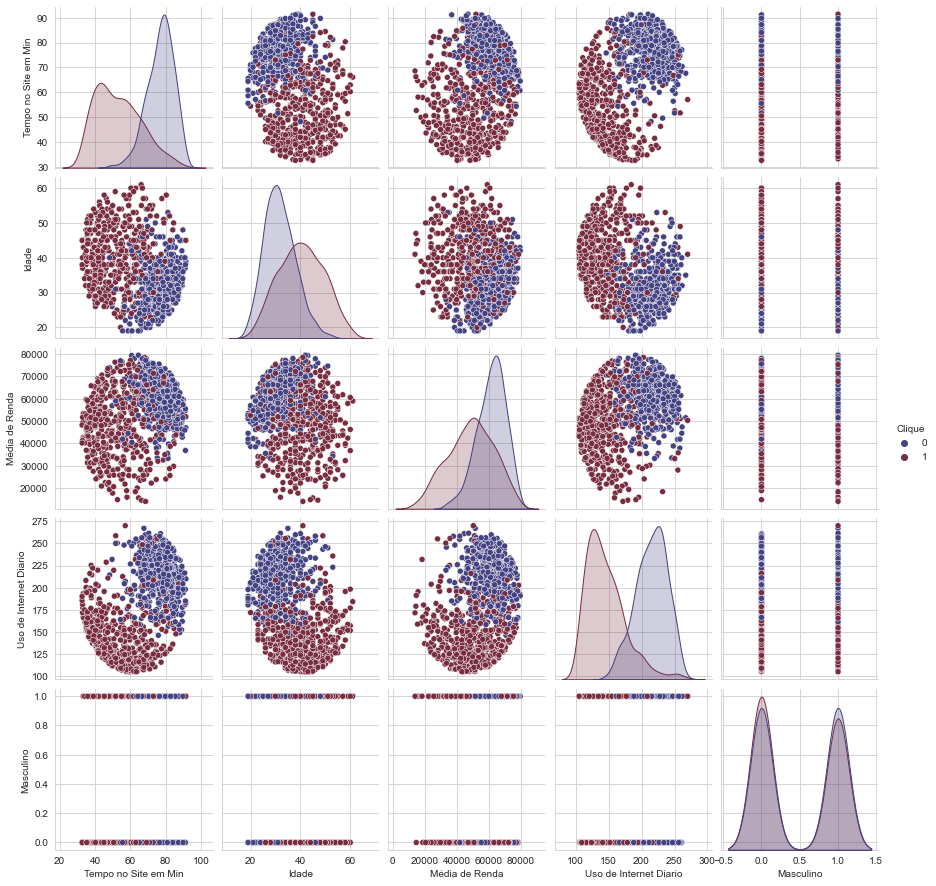

In [43]:
sns.pairplot(ad_data, hue='Clique', palette='icefire')


# Regressão Logística

Agora é hora de quebrar nossos dados em treino e teste e fitar nosso modelo.



In [44]:
ad_data.columns

Index(['Tempo no Site em Min', 'Idade', 'Média de Renda',
       'Uso de Internet Diario', 'Titulo do Anuncio', 'Cidade', 'Masculino',
       'País', 'Hora de Clique', 'Clique'],
      dtype='object')

In [67]:
X = ad_data[['Tempo no Site em Min', 'Idade', 'Média de Renda',
       'Uso de Internet Diario', 'Masculino']]

In [63]:
y = ad_data['Clique']

## Imports

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)

* Treinando e ajuste um modelo de regressão logística no conjunto de treinamento.

In [70]:
lom = LogisticRegression()

In [71]:
lom.fit(X_train, y_train)

LogisticRegression()

# Previsões e avaliações

In [72]:
predição = lom.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, predição))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       344
           1       0.94      0.86      0.90       356

    accuracy                           0.90       700
   macro avg       0.90      0.90      0.90       700
weighted avg       0.90      0.90      0.90       700

